# Iris dataset utilizando un árbol de decisión.

---



Partiendo del dataset Iris de la librería ***sklearn***, utilizaremos un **algoritmo supervisado** de machine learning de **árbol de decisión** con el objetivo de generar un modelo para predecir el tipo de flor por el tamaño del pétalo. En este caso estamos ante un problema de **clasificación**.

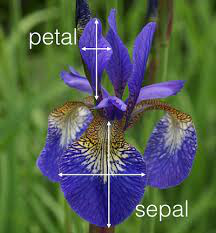

In [1]:
from PIL import Image
Image.open('images/iris.jpeg')

### Importar las librerías necesarias

Importamos inicialmente las librerías **numpy** y **pandas** de **Python**.

In [0]:
import numpy as np
import pandas as pd

### Carga del conjunto de datos

La librería ***sklearn*** nos va a proporcionar un conjunto de datos (dataset), en este caso el dataset Iris. por lo que para este ejercicio no será necesario leer ningún fichero .csv.


In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

### Análisis del conjunto de datos

En este apartado vamos a analizar el dataset. 

Las variables de entrada son:
*  el largo del sépalo en cm 
*  el ancho del sépalo en cm
*  el largo del pétalo en cm
*  el ancho del pétalo en cm

La variable de salida es el valor de clasificación del tipo de flor: 
*  0 (setosa)
*  1 (versicolor)
*  2 (virginica)

In [4]:
print("Variables de entrada:", iris_dataset.feature_names)
print("Valores de salida:", iris_dataset.target_names)

Variables de entrada: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Valores de salida: ['setosa' 'versicolor' 'virginica']


### Selección de variables para el modelo

Para nuestro ejercicio únicamente deseamos obtener la información asociada al pétalo, por lo tanto la información asociada al sépalo la descartamos para generar nuestro modelo.

In [5]:
from sklearn.tree import DecisionTreeClassifier
x = iris_dataset.data[:, 2:]
y = iris_dataset.target
print("Tamaño del dataset:", x.shape, y.shape)

Tamaño del dataset: (150, 2) (150,)


### Generación del modelo

En este ejercicio el objetivo es entender cómo se genera un modelo de **árbol de decisión** aplicando un algoritmo de machine learning. Por lo tanto en este caso no vamos a dividir el dataset para entrenamiento (train) y prueba (test).

Para generar nuestro modelo, indicamos al algoritmo ***DecisionTreeClassifier()*** que la profundidad máxima de nuestro árbol de decisión será de 2. El entrenamiento del modelo será con el dataset completo.


In [6]:
modeloADC = DecisionTreeClassifier(max_depth=2)
modeloADC.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Predicción de datos del modelo

Para realizar la predicción del modelo, en este caso vamos a utilizar el método ***predict_proba()*** parametrizado con los valores:
*   largo pétalo (cm): 3'5 
*   ancho pétalo (cm): 1'5

El retorno del método será la probabilidad por cada valor de clasificación para las medidas de pétalo introducidas:
*   0 (setosa): 0'00 % 
*   1 (versicolor): 90'74 %
*   2 (virginica): 9'25 %



In [7]:
modeloADC.predict_proba([[3.5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

Para realizar la predicción del modelo, en este caso vamos a utilizar el método ***predict()*** parametrizado con los valores:
*   largo pétalo: 3'5 
*   ancho pétalo: 1'5

El retorno del método será el valor de clasificación con la probabilidad más alta:
*   1 (versicolor)

In [8]:
modeloADC.predict([[3.5, 1.5]])

array([1])

### Definir una función para guardar las imágenes del árbol generado

Se define una función para guardar en una ruta determinada las imágenes del modelo de árbol de decisión que se va a generar.

In [0]:
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Visualización del árbol de decisión

Finalmente podemos visualizar el modelo de **árbol de decisión de clasificación** que ha generado el algoritmo de machine learning con el dataset Iris. 

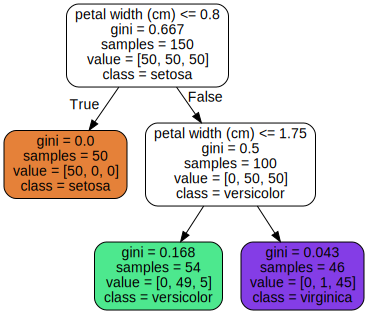

In [10]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(modeloADC, out_file=os.path.join(IMAGES_PATH, "arbol_iris.dot"), feature_names=iris_dataset.feature_names[2:], class_names=iris_dataset.target_names, rounded=True, filled=True)
Source.from_file(os.path.join(IMAGES_PATH, "arbol_iris.dot"))